# Recruit Restaurant Visitor Forecasting
## Predict how many future visitors a restaurant will receive

Running a thriving local restaurant isn't always as charming as first impressions appear. There are often all sorts of unexpected troubles popping up that could hurt business.

One common predicament is that restaurants need to know how many customers to expect each day to effectively purchase ingredients and schedule staff members. This forecast isn't easy to make because many unpredictable factors affect restaurant attendance, like weather and local competition. It's even harder for newer restaurants with little historical data.

Recruit Holdings has unique access to key datasets that could make automated future customer prediction possible. Specifically, Recruit Holdings owns Hot Pepper Gourmet (a restaurant review service), AirREGI (a restaurant point of sales service), and Restaurant Board (reservation log management software).

In this competition, you're challenged to use reservation and visitation data to predict the total number of visitors to a restaurant for future dates. This information will help restaurants be much more efficient and allow them to focus on creating an enjoyable dining experience for their customers.

### Prepare for modeling

In [1]:
import recruit_utils
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Import data into pandas data frames
data, stores = recruit_utils.import_data()

In [3]:
train, test = recruit_utils.create_train_test(data, stores, clean=True, predict_large_party=True)

Optimization terminated successfully.
         Current function value: 0.004078
         Iterations 13


In [4]:
# Define list of main predictor variables for visualizations
categorical_predictors = ['day', 'month', 'air_area_name4', 'air_area_name',
                    'air_area_name2', 'wom', 'date_int', 'dow',
                    'air_genre_name1', 'air_genre_name0', 'air_genre_name',  
                    'holiday_flg', 'year', 'air_area_name0']
                    

numeric_predictors = ['median_visitors', 'max_visitors', 'min_visitors', 'rv1_x',
                'count_observations', 'rv2_x', 'longitude', 'rs2_x', 'rs1_x']

target_columns = ['visitors', 'log_visitors']

id_columns = ['air_store_id', 'id', 'air_store_id2']

### Fit a linear model using OLS

In [5]:
subset = numeric_predictors + categorical_predictors

y = train[target_columns[1]]
X = train[subset]

lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           log_visitors   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Tue, 06 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:15:27   Log-Likelihood:            -2.4427e+05
No. Observations:              250468   AIC:                         4.886e+05
Df Residuals:                  250447   BIC:                         4.888e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_visitors        0.0468      0

In [6]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\pandas\core\series.py:1410: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


,VIF Factor,features
0,3.000000,median_visitors
1,1.400000,max_visitors
2,2.300000,min_visitors
3,3.300000,rv1_x
4,1.100000,count_observations
5,3.000000,rv2_x
6,7.100000,longitude
7,2.000000,rs2_x
8,1.900000,rs1_x
9,inf,day


In [48]:
# Define list of main predictor variables for visualizations
categorical_predictors = ['day', 'month', 'air_area_name', 'day_of_week', 
                    'air_genre_name', 'holiday_flg']                    

numeric_predictors = ['median_visitors', 'max_visitors', 'min_visitors', 'rv2_x', 'rs2_x']

subset = numeric_predictors + categorical_predictors

In [8]:
y = train[target_columns[1]]
X = train[subset]

lm2 = sm.OLS(y, X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_visitors   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.097e+05
Date:                Tue, 06 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:15:35   Log-Likelihood:            -2.8222e+05
No. Observations:              250468   AIC:                         5.645e+05
Df Residuals:                  250457   BIC:                         5.646e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
median_visitors     0.0588      0.000    3

In [9]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,9.4,median_visitors
1,3.9,max_visitors
2,3.8,min_visitors
3,1.8,rv2_x
4,1.8,rs2_x
5,3.5,day
6,3.3,month
7,3.1,air_area_name
8,2.8,day_of_week
9,3.4,air_genre_name


In [10]:
# Cross-validation testing for linear model
lm = linear_model.LinearRegression()
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()

cv_results = recruit_utils.time_series_cv(y, X, lm)
print(np.mean(cv_results))

0.643821711963


In [11]:
# Store and score using OLS linear model
lm_fit = lm.fit(X, y)
X_test = test[subset].as_matrix()
lm_predictions = lm_fit.predict(X_test)
recruit_utils.score_predictions(lm_predictions, 'scored_lm')

In [44]:
# Prepare subset again for the next model
subset = train.columns.values.tolist()
subset = [col for col in subset if col not in target_columns + id_columns]
subset.remove('visit_date')
subset.remove('subset')

### Lasso regression regularization

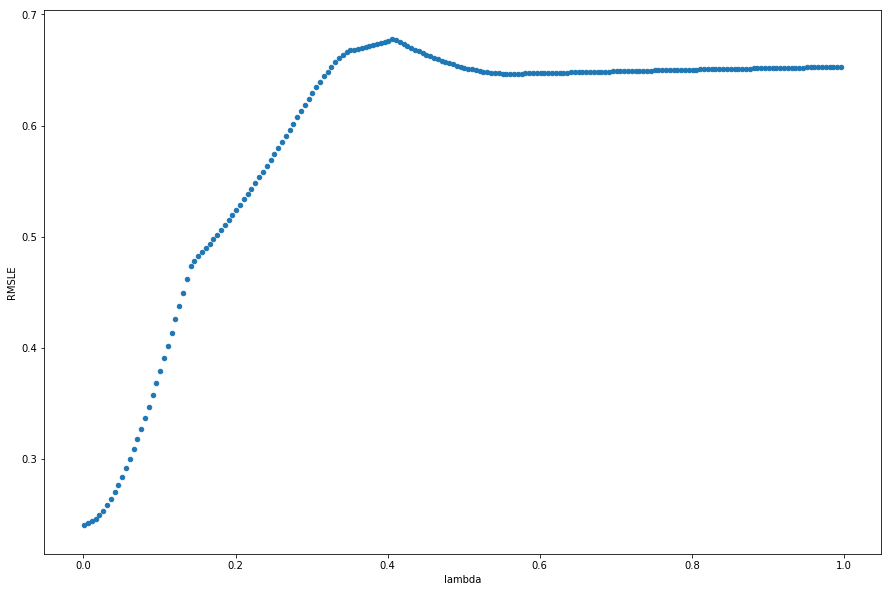

In [20]:
# Lasso regression model and CV results
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()
cv_results_df = pd.DataFrame(columns=['lambda', 'RMSLE'])

for alpha in np.arange(0.001, 1.000, 0.005):
    clf = linear_model.Lasso(alpha=alpha)

    cv_results = recruit_utils.time_series_cv(y, X, clf)
    temp_df = pd.DataFrame([[alpha, np.mean(cv_results)]], columns=['lambda', 'RMSLE'])
    cv_results_df = cv_results_df.append(temp_df, ignore_index=True)
    
cv_results_df.plot.scatter(x='lambda', y='RMSLE', figsize=(15, 10))
lasso_cv_results_df = cv_results_df

In [21]:
# Minimum RMSLE CV result
print(lasso_cv_results_df.RMSLE.min())

0.240841571591


In [49]:
# Lasso fit and scoring
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()
X_test = test[subset].as_matrix()

clf = linear_model.Lasso(alpha=0.001)
clf_fit = clf.fit(X, y)

lasso_predictions = clf_fit.predict(X_test)
recruit_utils.score_predictions(lasso_predictions, 'scored_lasso.csv')

In [6]:
# Prepare subset again for the next model
subset = train.columns.values.tolist()
subset = [col for col in subset if col not in target_columns + id_columns]
subset.remove('visit_date')
subset.remove('subset')

### Tree-based regression

In [51]:
# Random forest regression
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()

rfr = RandomForestRegressor(n_estimators=1000, 
                            max_features="sqrt", 
                            max_depth=3, 
                            n_jobs=-1, 
                            random_state=0)

rfr_cv_results = recruit_utils.time_series_cv(y, X, rfr)

In [52]:
# Random Forest CV results
print(np.mean(rfr_cv_results))

0.0583627526939


In [8]:
# Random forest fit and scoring
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()
X_test = test[subset].as_matrix()

rfr = RandomForestRegressor(n_estimators=1000, max_features="sqrt", max_depth=3, n_jobs=-1, random_state=0)
rfr_fit = rfr.fit(X, y)

random_forest_predictions = rfr_fit.predict(X_test)

In [9]:
recruit_utils.score_predictions(random_forest_predictions, 'scored_random_forest')

### Gradient Boosting using LightGBM

Documentation: https://lightgbm.readthedocs.io/en/latest/

Quick overview: https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [53]:
# LightGBM Cross Validation
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
lgbm_cv_results = recruit_utils.time_series_cv(y, X, lgbm)

In [54]:
# LightGBM Cross Validation results
print(np.mean(lgbm_cv_results))

0.0720092699232


In [55]:
# Light GBM fit and scoring
lgbm_fit = lgbm.fit(X, y)
X_test = test[subset].as_matrix()
lgbm_predictions = lgbm_fit.predict(X_test)
recruit_utils.score_predictions(lgbm_predictions, 'scored_lgbm')

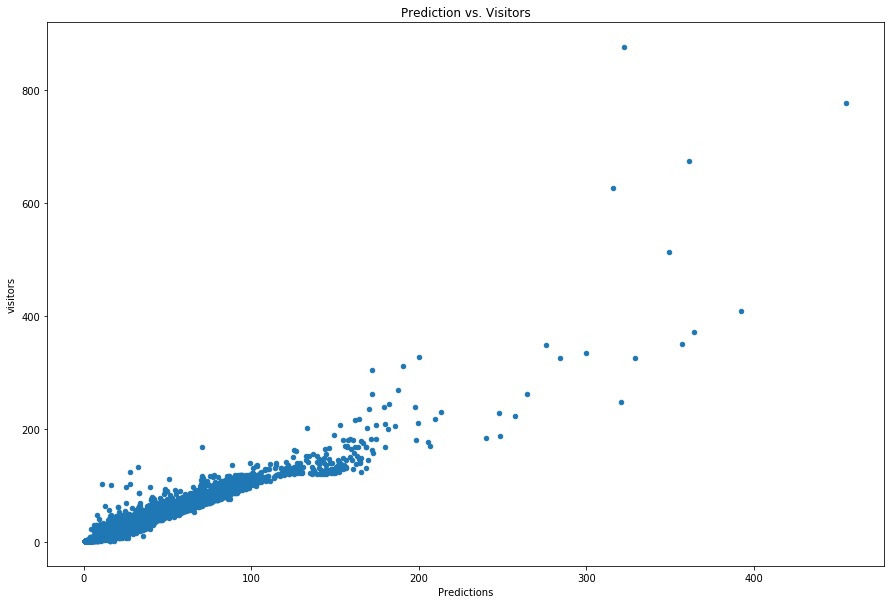

In [57]:
# Plot y vs y-hat
p = np.exp(lgbm_fit.predict(train[subset]))
train['Predictions'] = p
train.plot.scatter(x='Predictions', y='visitors', figsize=(15, 10), title='Prediction vs. Visitors')